# Setup

In [72]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [3]:
path = pathlib.Path().resolve()

In [4]:
pd.options.display.max_columns = None

# Import chunks

In [4]:
df = pd.DataFrame()

In [91]:
chunks = pd.read_csv(path / "ignored-data" / "vehicles_2022" /"2019-21_data_compiled_zipcitymatched.csv" , chunksize = 1000)

In [6]:
# Import the dataset, chunk by chunk, in order to observe it
i = 0

for chunk in chunks:
    if i < 100:
        df = pd.concat([df, chunk])
        print(i)
        i +=1
    else:
        break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [7]:
# Save the first 100 chunks of the dataset
df.to_csv(path / "data" / "outputs" / "municipal_data_first100k.csv")

# Observe chunks

In [32]:
df.columns

Index(['Unnamed: 0', 'index', 'record_from', 'UID', 'name', 'street', 'city',
       'state', 'zip', 'vehicle_year', 'vehicle_make', 'vehicle_model',
       'vehicle_class', 'vehicle_id', 'lease_city', 'lease_state',
       'lease_street', 'lease_zip', 'city_list', 'zip_list', 'city_matched',
       'zip_matched', 'valid_city', 'valid_zip', 'rep', 'lease_city_list',
       'lease_zip_list', 'lease_city_matched', 'lease_zip_matched',
       'lease_valid_city', 'lease_valid_zip', 'lease_rep', 'data_year'],
      dtype='object')

In [8]:
df = df.drop("Unnamed: 0", axis =1)

In [14]:
df.head()

,index,record_from,UID,name,street,city,state,zip,vehicle_year,vehicle_make,vehicle_model,vehicle_class,vehicle_id,lease_city,lease_state,lease_street,lease_zip,city_list,zip_list,city_matched,zip_matched,valid_city,valid_zip,rep,lease_city_list,lease_zip_list,lease_city_matched,lease_zip_matched,lease_valid_city,lease_valid_zip,lease_rep,data_year
0,0,2_Ansonia_MVData_2019.csv,19_0000001,445 Beaver Brook Llc,27 Ivy Cir Ofc B,West Haven,CT,5743.0,NaN,FORD,F250 SUP,NaN,1FTNX21L93EC84774,NaN,NaN,NaN,NaN,NaN,05743|06516|84401|28704,False,False,True,False,2,NaN,NaN,False,False,True,True,1,2019
1,1,2_Ansonia_MVData_2019.csv,19_0000002,A & S Nathan Heating & Cooling Llc,34 Clifton Ave,Ansonia,CT,6401.0,NaN,FORD,ECONOLIN,NaN,1FTNE2EWXDDB06700,NaN,NaN,NaN,NaN,NaN,06401|16901|45303,False,False,True,False,2,NaN,NaN,False,False,True,True,1,2019
2,2,2_Ansonia_MVData_2019.csv,19_0000003,A & S Nathan Heating & Cooling Llc,34 Clifton Ave,Ansonia,CT,6401.0,NaN,NISSA,NV 2500/,NaN,1N6AF0LX5FN808722,NaN,NaN,NaN,NaN,NaN,06401|16901|45303,False,False,True,False,2,NaN,NaN,False,False,True,True,1,2019
3,3,2_Ansonia_MVData_2019.csv,19_0000004,A & S Nathan Heating & Cooling Llc,34 Clifton Ave,Ansonia,CT,6401.0,NaN,FORD,F250 SUP,NaN,1FT7X2B66HEB25980,NaN,NaN,NaN,NaN,NaN,06401|16901|45303,False,False,True,False,2,NaN,NaN,False,False,True,True,1,2019
4,4,2_Ansonia_MVData_2019.csv,19_0000005,A & S Nathan Heating & Cooling Llc,34 Clifton Ave,Ansonia,CT,6401.0,NaN,NISSA,NV2500S/,NaN,1N6AF0LY2GN814651,NaN,NaN,NaN,NaN,NaN,06401|16901|45303,False,False,True,False,2,NaN,NaN,False,False,True,True,1,2019


In [44]:
df["record_from"].unique()

array(['2_Ansonia_MVData_2019.csv', '3_Ashford_MVData_2019.csv',
       '5_Barkhamstead_MVData_2019.csv', '7_Berlin_MVData_2019.csv',
       '8_Bethany_MVData_2019.csv', '10_Bethlehem_MVData_2019.csv',
       '11_Bloomfield_MVData_2019.csv', '12_Bolton_MVData_2019.csv',
       '14_Branford_MVData_2019.csv'], dtype=object)

In [18]:
df["city"].unique()

array(['West Haven', 'Ansonia', 'New Haven', 'Derby', 'Arlington',
       'Beacon Falls', 'Middletown', 'Milford', 'Waterbury', 'Seymour',
       'W Hempstead', 'Bridgeport', 'Shelton', 'Mount Laurel', 'Lawrence',
       'Stratford', 'Nampa', 'Bethany', 'North Haven', 'Daytona Beach',
       'Bristol', 'Watertown', 'Naugatuck', 'Woodbridge', 'Glastonbury',
       'Newport', 'Stamford', 'Duluth', 'Manchester', 'Colchester',
       'Dallas', 'Fairfield', 'Hamden', 'Yonkers', 'Meriden',
       'Fort Worth', 'Crewe', 'Norwalk', 'Charlotte', 'Trumbull',
       'Oxford', 'Brooklyn', 'Middlebury', 'Tulsa', 'Saint Louis',
       'East Haven', 'Conway', 'West Hollywood', 'Phoenix', 'Oakville',
       'Northford', 'Hilliard', 'Fort Lauderdale', 'The Villages',
       'Higganum', 'Crofton', 'Fallsburg', 'Wellington', 'Sparks',
       'Sparks Glencoe', 'Salinas', 'Cheshire', 'Newtown', 'Monroe',
       'Branford', 'Santee', 'Holyoke', 'Atlanta', 'Fountain Valley',
       'Wolcott', 'Jacksonville',

In [16]:
# Observe rows with no VIN
df[df["vehicle_id"].isna()]

,index,record_from,UID,name,street,city,state,zip,vehicle_year,vehicle_make,vehicle_model,vehicle_class,vehicle_id,lease_city,lease_state,lease_street,lease_zip,city_list,zip_list,city_matched,zip_matched,valid_city,valid_zip,rep,lease_city_list,lease_zip_list,lease_city_matched,lease_zip_matched,lease_valid_city,lease_valid_zip,lease_rep,data_year
57265,57265,11_Bloomfield_MVData_2019.csv,19_0057266,A & H Electrical Services Llp,NaN,Bloomfield,CT,NaN,NaN,NaN,ACCORD E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57266,57266,11_Bloomfield_MVData_2019.csv,19_0057267,A White Company Llc,NaN,Bloomfield,CT,NaN,NaN,NaN,EQUINOX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57267,57267,11_Bloomfield_MVData_2019.csv,19_0057268,Aa Glass Co Inc,NaN,Bloomfield,CT,NaN,NaN,NaN,COBALT L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57268,57268,11_Bloomfield_MVData_2019.csv,19_0057269,Aa Glass Inc,NaN,Bloomfield,CT,NaN,NaN,NaN,SILVERAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57269,57269,11_Bloomfield_MVData_2019.csv,19_0057270,Aa Glass Inc,NaN,Bloomfield,CT,NaN,NaN,NaN,SIERRA K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76903,76903,11_Bloomfield_MVData_2019.csv,19_0076904,Arroyo Raymond Jay,NaN,Bloomfield,CT,NaN,NaN,NaN,T1 AWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
76904,76904,11_Bloomfield_MVData_2019.csv,19_0076905,Arroyo Susan J,NaN,Bloomfield,CT,NaN,NaN,NaN,JETTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
76905,76905,11_Bloomfield_MVData_2019.csv,19_0076906,Arroyo Raymond Jay,NaN,Bloomfield,CT,NaN,NaN,NaN,T1 AWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
76906,76906,11_Bloomfield_MVData_2019.csv,19_0076907,Arroyo Susan,NaN,Bloomfield,CT,NaN,NaN,NaN,FORTE EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019


In [50]:
# Observe rows with no VIN - they are all from bloomfield
df[df["vehicle_id"].isna()]["city"].unique()

array(['Bloomfield'], dtype=object)

In [19]:
# Observe rows with no VIN - they are all from bloomfield same file
df[df["vehicle_id"].isna()]["record_from"].unique()

array(['11_Bloomfield_MVData_2019.csv'], dtype=object)

In [25]:
# Large number of unique names
df[df["vehicle_id"].isna()]["name"].nunique()

12257

In [26]:
# Some of these are not cars - e.g. a UT58SS is a trailer
# https://ledgewoodpowersports.com/Utility-Trailers-Load-Rite-UT58SS-2018-Ledgewood-NJ-93106d6a-fba1-4e3d-b503-a83a00e19dd1G
df[df["vehicle_id"].isna()]["vehicle_model"].unique()

array(['ACCORD E', 'EQUINOX', 'COBALT L', ..., 'CR V', 'T1 AWD', 'JETTA'],
      dtype=object)

In [28]:
# Nonetheless, a lot of them appear to be cars
df[df["vehicle_id"].isna()]["vehicle_model"].unique()[0:60]

array(['ACCORD E', 'EQUINOX', 'COBALT L', 'SILVERAD', 'SIERRA K',
       'ECONOLIN', 'TRANSIT', 'CA12', 'TOWN CAR', 'QX60', 'LACROSSE',
       'LEGACY 2', 'F350 SUP', 'FE640', 'NPR', 'CM714CCH', 'F250',
       'CR-V LX', 'ODYSSEY', 'ACCORD L', 'BRZ 2.0', 'ALTIMA 2',
       'CAMRY HY', 'ML350', 'SENTRA S', 'QUEST SE', 'CONSTRUC', 'F150',
       'GRAND CH', 'F SUPER', 'COOPER', 'TRAVERSE', 'CORVETTE',
       'EXPLORER', 'MUSTANG', 'MALIBU L', 'MURANO S', 'RAV4 LE',
       'ENVISION', 'ATS AWD', 'XT4 PREM', 'XT5 LUXU', 'CT6 LUXU',
       'ENCORE P', 'ENCLAVE', 'TERRAIN', 'BOLT EV', 'TAHOE K1',
       'YUKON DE', 'CTS', 'YUKON', 'CANYON', 'SIERRA A', 'TRAX 1LT',
       'ESCALADE', 'ACADIA D', 'COLORADO', 'VOLT LT', 'K1500 SU',
       'ACADIA S'], dtype=object)

In [31]:
# Check how many have a valid ZIP code
len(df[df["zip"].isna()])

19678

In [32]:
# Check from what states they come from - they come from all states
df[df["zip"].isna()]["state"].unique()

array([nan, 'PR', 'CT', 'FL', 'MD', 'WA', 'VA', 'NC', 'TX', 'GA', 'NY',
       'WI', 'NJ', 'MO', 'MI', 'SC', 'MA', 'OR', 'IN', 'CA', 'IL', 'AZ',
       'MN', 'OH', 'TN', 'CO', 'NH', 'VT', 'PA', 'RI', 'UT', 'NV', 'IA'],
      dtype=object)

In [46]:
# Missing ZIPs are from all reports
df[df["zip"].isna()]["record_from"].unique()

array(['2_Ansonia_MVData_2019.csv', '3_Ashford_MVData_2019.csv',
       '10_Bethlehem_MVData_2019.csv', '11_Bloomfield_MVData_2019.csv',
       '12_Bolton_MVData_2019.csv', '14_Branford_MVData_2019.csv'],
      dtype=object)

In [41]:
# Check from what states they come from - they come from all states. Why not CT? 
# Appear mostly to be leasing, company cars, etc. 
df[(df["zip"].isna()) & (df["state"]!="CT") & ~(df["state"].isna())][50:60]

,index,record_from,UID,name,street,city,state,zip,vehicle_year,vehicle_make,vehicle_model,vehicle_class,vehicle_id,lease_city,lease_state,lease_street,lease_zip,city_list,zip_list,city_matched,zip_matched,valid_city,valid_zip,rep,lease_city_list,lease_zip_list,lease_city_matched,lease_zip_matched,lease_valid_city,lease_valid_zip,lease_rep,data_year
57346,57346,11_Bloomfield_MVData_2019.csv,19_0057347,Acar Leasing Ltd,NaN,Bloomfield,TX,NaN,NaN,NaN,MALIBU L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57347,57347,11_Bloomfield_MVData_2019.csv,19_0057348,Acar Leasing Ltd,NaN,Bloomfield,TX,NaN,NaN,NaN,TRAVERSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57736,57736,11_Bloomfield_MVData_2019.csv,19_0057737,Allison Jermaine K,NaN,Bloomfield,FL,NaN,NaN,NaN,OUTBACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57737,57737,11_Bloomfield_MVData_2019.csv,19_0057738,Allison Jermaine K,NaN,Bloomfield,FL,NaN,NaN,NaN,C230K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57857,57857,11_Bloomfield_MVData_2019.csv,19_0057858,Anderson Gladys M,NaN,Bloomfield,GA,NaN,NaN,NaN,HIGHLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57954,57954,11_Bloomfield_MVData_2019.csv,19_0057955,Antony Dany N,NaN,Bloomfield,NY,NaN,NaN,NaN,RX 350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57962,57962,11_Bloomfield_MVData_2019.csv,19_0057963,Appiah Kubi E,NaN,Bloomfield,MD,NaN,NaN,NaN,RONDO/LX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57965,57965,11_Bloomfield_MVData_2019.csv,19_0057966,Applewhite Sharielle D,NaN,Bloomfield,NY,NaN,NaN,NaN,LIBERTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57971,57971,11_Bloomfield_MVData_2019.csv,19_0057972,Arbon Equipment Corporation,NaN,Bloomfield,WI,NaN,NaN,NaN,3CAM612T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019
57972,57972,11_Bloomfield_MVData_2019.csv,19_0057973,Arbon Equipment Corporation,NaN,Bloomfield,WI,NaN,NaN,NaN,610RT60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2019


In [43]:
# Check where the ZIP is NOT NA
df[~df["zip"].isna()]["state"].unique()

array(['CT', 'TX', 'NY', 'NJ', 'MA', 'ID', 'FL', 'VT', 'GA', 'VA', 'NC',
       'OK', 'MO', 'SC', 'CA', 'AZ', 'OH', 'MD', 'MS', 'IN', 'DE', 'TN',
       'CO', 'RI', 'IL', 'WI', 'MN', 'MI', 'ME', 'NH', 'DC', 'AL', 'Y',
       'NE', 'PA', 'WV', 'WY', 'WA', 'AR', 'UT', 'VI', 'AK', 'OR', 'KY'],
      dtype=object)

In [49]:
# Check what cities they come from - a limited number...
df[df["zip"].isna()][["record_from","city", "state"]]

,record_from,city,state
288,2_Ansonia_MVData_2019.csv,Ansonia,NaN
324,2_Ansonia_MVData_2019.csv,Ansonia,PR
1370,2_Ansonia_MVData_2019.csv,Ansonia,CT
1953,2_Ansonia_MVData_2019.csv,Ansonia,NaN
2362,2_Ansonia_MVData_2019.csv,Ansonia,FL
...,...,...,...
78600,12_Bolton_MVData_2019.csv,Bolton,FL
78955,12_Bolton_MVData_2019.csv,West Palm,FL
79647,12_Bolton_MVData_2019.csv,Bolton,CT
81865,12_Bolton_MVData_2019.csv,Bolton,CT


In [34]:
# Compared to the full number of cities
df[~df["zip"].isna()]["city"].unique()

array(['West Haven', 'Ansonia', 'New Haven', 'Derby', 'Arlington',
       'Beacon Falls', 'Middletown', 'Milford', 'Waterbury', 'Seymour',
       'W Hempstead', 'Bridgeport', 'Shelton', 'Mount Laurel', 'Lawrence',
       'Stratford', 'Nampa', 'Bethany', 'North Haven', 'Daytona Beach',
       'Bristol', 'Watertown', 'Naugatuck', 'Woodbridge', 'Glastonbury',
       'Newport', 'Stamford', 'Duluth', 'Manchester', 'Colchester',
       'Dallas', 'Fairfield', 'Hamden', 'Yonkers', 'Meriden',
       'Fort Worth', 'Crewe', 'Norwalk', 'Charlotte', 'Trumbull',
       'Oxford', 'Brooklyn', 'Middlebury', 'Tulsa', 'Saint Louis',
       'East Haven', 'Conway', 'West Hollywood', 'Phoenix', 'Oakville',
       'Northford', 'Hilliard', 'Fort Lauderdale', 'The Villages',
       'Higganum', 'Crofton', 'Fallsburg', 'Wellington', 'Sparks',
       'Sparks Glencoe', 'Salinas', 'Cheshire', 'Newtown', 'Monroe',
       'Branford', 'Santee', 'Holyoke', 'Atlanta', 'Fountain Valley',
       'Wolcott', 'Jacksonville',

### Initial conclusions:
* Missing VINs:
    * Missing VINs all appear to be coming from one place - Bloomfield CT
* Missing ZIPs
    * Missing ZIPs are from all records - i.e. from all CT cities
    * Where the ZIP is NA, it appearst to be coming from a limited number of cities - some of them are in CT but some of them are not (e.g., West Palm in Florida)

In [62]:
# Test this out
a = df.groupby("record_from")["zip"].apply(lambda x: x.isna().sum()).reset_index(name="Missing ZIP")
b = a[0:2]
c = a[3:5]
pd.concat([b,c])

,record_from,Missing ZIP
0,10_Bethlehem_MVData_2019.csv,9
1,11_Bloomfield_MVData_2019.csv,19643
3,14_Branford_MVData_2019.csv,1
4,2_Ansonia_MVData_2019.csv,12


In [67]:
a

,record_from,Missing ZIP
0,10_Bethlehem_MVData_2019.csv,9
1,11_Bloomfield_MVData_2019.csv,19643
2,12_Bolton_MVData_2019.csv,7
3,14_Branford_MVData_2019.csv,1
4,2_Ansonia_MVData_2019.csv,12
5,3_Ashford_MVData_2019.csv,6
6,5_Barkhamstead_MVData_2019.csv,0
7,7_Berlin_MVData_2019.csv,0
8,8_Bethany_MVData_2019.csv,0


In [64]:
a2 = df.groupby("record_from")["vehicle_id"].apply(lambda x: x.isna().sum()).reset_index(name="Missing VIN")
a2

,record_from,Missing VIN
0,10_Bethlehem_MVData_2019.csv,0
1,11_Bloomfield_MVData_2019.csv,19643
2,12_Bolton_MVData_2019.csv,0
3,14_Branford_MVData_2019.csv,0
4,2_Ansonia_MVData_2019.csv,0
5,3_Ashford_MVData_2019.csv,0
6,5_Barkhamstead_MVData_2019.csv,0
7,7_Berlin_MVData_2019.csv,0
8,8_Bethany_MVData_2019.csv,0


In [72]:
b.merge(a,how ='outer', left_on = "record_from", right_on = "record_from")

,record_from,Missing ZIP_x,Missing ZIP_y
0,10_Bethlehem_MVData_2019.csv,9.0,9
1,11_Bloomfield_MVData_2019.csv,19643.0,19643
2,12_Bolton_MVData_2019.csv,NaN,7
3,14_Branford_MVData_2019.csv,NaN,1
4,2_Ansonia_MVData_2019.csv,NaN,12
5,3_Ashford_MVData_2019.csv,NaN,6
6,5_Barkhamstead_MVData_2019.csv,NaN,0
7,7_Berlin_MVData_2019.csv,NaN,0
8,8_Bethany_MVData_2019.csv,NaN,0


In [77]:
df.groupby("record_from")["state"].apply(lambda x: (x!="CT").sum()).reset_index(name ="state is not CT")

,record_from,state is not CT
0,10_Bethlehem_MVData_2019.csv,206
1,11_Bloomfield_MVData_2019.csv,1630
2,12_Bolton_MVData_2019.csv,288
3,14_Branford_MVData_2019.csv,1991
4,2_Ansonia_MVData_2019.csv,1063
5,3_Ashford_MVData_2019.csv,185
6,5_Barkhamstead_MVData_2019.csv,177
7,7_Berlin_MVData_2019.csv,1992
8,8_Bethany_MVData_2019.csv,328


In [74]:
z

record_from
10_Bethlehem_MVData_2019.csv       206
11_Bloomfield_MVData_2019.csv     1630
12_Bolton_MVData_2019.csv          288
14_Branford_MVData_2019.csv       1991
2_Ansonia_MVData_2019.csv         1063
3_Ashford_MVData_2019.csv          185
5_Barkhamstead_MVData_2019.csv     177
7_Berlin_MVData_2019.csv          1992
8_Bethany_MVData_2019.csv          328
Name: state, dtype: int64

# Full analysis

In [245]:
chunks = pd.read_csv(path / "ignored-data" / "vehicles_2022" /"2019-21_data_compiled_zipcitymatched.csv" , chunksize = 1000)

In [246]:
i = 0

df = pd.DataFrame([])

In [247]:
for chunk in chunks:
    # Give progress
    if (i % 100 ==0):
        print(f"Currently on chunk number {i}")
        display(df)
        
    # Create DF
    total = chunk.groupby("record_from").count()["index"].reset_index(name="count")
    missing_zips = chunk.groupby("record_from")["zip"].apply(lambda x: x.isna().sum()).reset_index(name = "missing zip")
    missing_vins = chunk.groupby("record_from")["vehicle_id"].apply(lambda x: x.isna().sum()).reset_index(name = "missing VIN")
    state_not_CT = chunk.groupby("record_from")["state"].apply(lambda x: (x!="CT").sum()).reset_index(name ="not CT")
    all_columns  = missing_zips.merge(missing_vins,
                                  how='outer',
                                  left_on = 'record_from',
                                  right_on = 'record_from')
    all_columns  = all_columns.merge(state_not_CT,
                                  how='outer',
                                  left_on = 'record_from',
                                  right_on = 'record_from')
    all_columns = all_columns.merge(total,
                                    how = 'outer',
                                    left_on = 'record_from',
                                    right_on = 'record_from')
    
    
    # Assign this to a DF to save
    df = pd.concat([df, all_columns])
    
    # add to count
    i +=1

df = df.groupby("record_from").sum()
df = df.reset_index()

# Get the details out of the from_record column
record_from_split = pd.DataFrame(list(df["record_from"].str.split("_")),
                                 columns = ["number", "town", "suffix", "year", "other"])
record_from_split = record_from_split.drop("other", axis =1 )
record_from_split["year"] = record_from_split["year"].str.replace("\..*$", "")

Currently on chunk number 0


""


Currently on chunk number 100


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,14_Branford_MVData_2019.csv,0,0,414,1000
0,14_Branford_MVData_2019.csv,0,0,37,1000
0,14_Branford_MVData_2019.csv,0,0,8,1000
0,14_Branford_MVData_2019.csv,0,0,7,1000


Currently on chunk number 200


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,17_Bristol_MVData_2019.csv,0,0,378,1000
0,17_Bristol_MVData_2019.csv,0,0,17,1000
0,17_Bristol_MVData_2019.csv,0,0,7,1000
0,17_Bristol_MVData_2019.csv,0,0,6,1000


Currently on chunk number 300


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,25_Cheshire_MVData_2019.csv,0,0,10,1000
0,25_Cheshire_MVData_2019.csv,0,0,58,1000
0,25_Cheshire_MVData_2019.csv,1,0,18,1000
0,25_Cheshire_MVData_2019.csv,0,0,241,1000


Currently on chunk number 400


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,42_East_Hartford_MVData_2019.csv,0,0,6,1000
0,42_East_Hartford_MVData_2019.csv,0,0,144,1000
0,42_East_Hartford_MVData_2019.csv,0,0,32,1000
0,42_East_Hartford_MVData_2019.csv,1,0,3,1000


Currently on chunk number 500


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
1,51_Fairfield_MVData_2019.csv,0,0,354,467
0,51_Fairfield_MVData_2019.csv,0,0,266,1000
0,51_Fairfield_MVData_2019.csv,0,0,22,1000
0,51_Fairfield_MVData_2019.csv,0,0,5,1000


Currently on chunk number 600


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,54_Glastonbury_MVData_2019.csv,1,0,22,1000
0,54_Glastonbury_MVData_2019.csv,0,0,329,1000
0,54_Glastonbury_MVData_2019.csv,1,0,190,1000
0,54_Glastonbury_MVData_2019.csv,0,0,290,1000


Currently on chunk number 700


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,69_Killingly_MVData_2019.csv,0,0,10,1000
0,69_Killingly_MVData_2019.csv,0,0,44,1000
0,69_Killingly_MVData_2019.csv,0,0,8,1000
0,69_Killingly_MVData_2019.csv,0,0,146,1000


Currently on chunk number 800


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,80_Meriden_MVData_2019.csv,0,0,0,1000
0,80_Meriden_MVData_2019.csv,0,0,97,1000
0,80_Meriden_MVData_2019.csv,0,0,0,1000
0,80_Meriden_MVData_2019.csv,0,0,17,1000


Currently on chunk number 900


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,93_NewHaven_MVData_2019.csv,0,0,0,1000
0,93_NewHaven_MVData_2019.csv,0,0,4,1000
0,93_NewHaven_MVData_2019.csv,0,0,1,1000
0,93_NewHaven_MVData_2019.csv,0,0,90,1000


Currently on chunk number 1000


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,108_Oxford_MVData_2019.csv,0,0,117,1000
0,108_Oxford_MVData_2019.csv,0,0,146,1000
0,108_Oxford_MVData_2019.csv,0,0,1,432
1,109_Plainfield_MVData_2019.csv,0,0,78,568


Currently on chunk number 1100


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,130_South_Windsor_MVData_2019.csv,0,0,18,1000
0,130_South_Windsor_MVData_2019.csv,0,0,7,1000
0,130_South_Windsor_MVData_2019.csv,0,0,27,1000
0,130_South_Windsor_MVData_2019.csv,1,0,260,1000


Currently on chunk number 1200


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,148_Wallingford_MVData_2019.csv,0,0,3,1000
0,148_Wallingford_MVData_2019.csv,1,0,3,1000
0,148_Wallingford_MVData_2019.csv,0,0,13,1000
0,148_Wallingford_MVData_2019.csv,0,0,6,1000


Currently on chunk number 1300


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,159_Wethersfield_MVData_2019.csv,0,0,46,1000
0,159_Wethersfield_MVData_2019.csv,0,0,8,1000
0,159_Wethersfield_MVData_2019.csv,0,0,66,1000
0,159_Wethersfield_MVData_2019.csv,0,0,38,1000


Currently on chunk number 1400


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,168_Woodbury_MVData_2019.csv,0,0,6,1000
0,168_Woodbury_MVData_2019.csv,0,0,97,1000
0,168_Woodbury_MVData_2019.csv,0,0,9,1000
0,168_Woodbury_MVData_2019.csv,0,0,13,1000


Currently on chunk number 1500


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,28_Colchester_MVData_2020.csv,0,0,64,1000
0,28_Colchester_MVData_2020.csv,0,0,8,1000
0,28_Colchester_MVData_2020.csv,0,0,6,1000
0,28_Colchester_MVData_2020.csv,0,0,6,1000


Currently on chunk number 1600


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,38_Durham_MVData_2020.csv,0,0,41,1000
0,38_Durham_MVData_2020.csv,0,0,110,1000
0,38_Durham_MVData_2020.csv,0,0,8,1000
0,38_Durham_MVData_2020.csv,0,0,48,1000


Currently on chunk number 1700


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,57_Greenwich_MVData_2020.csv,0,0,19,1000
0,57_Greenwich_MVData_2020.csv,0,0,10,1000
0,57_Greenwich_MVData_2020.csv,0,0,3,1000
0,57_Greenwich_MVData_2020.csv,0,0,10,1000


Currently on chunk number 1800


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,64_Hartford_MVData_2020.csv,0,0,16,1000
0,64_Hartford_MVData_2020.csv,0,0,2,1000
0,64_Hartford_MVData_2020.csv,0,0,57,1000
0,64_Hartford_MVData_2020.csv,0,0,5,1000


Currently on chunk number 1900


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,84_Milford_MVData_2020.csv,0,0,1,1000
0,84_Milford_MVData_2020.csv,0,0,3,1000
0,84_Milford_MVData_2020.csv,0,0,262,1000
0,84_Milford_MVData_2020.csv,0,0,533,1000


Currently on chunk number 2000


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,89_NewBritain_MVData_2020.csv,0,0,4,1000
0,89_NewBritain_MVData_2020.csv,0,0,320,1000
0,89_NewBritain_MVData_2020.csv,0,0,67,1000
0,89_NewBritain_MVData_2020.csv,0,0,114,1000


KeyboardInterrupt: 

In [248]:
df_norwalk

,Unnamed: 0,index,record_from,UID,name,street,city,state,zip,vehicle_year,vehicle_make,vehicle_model,vehicle_class,vehicle_id,lease_city,lease_state,lease_street,lease_zip,city_list,zip_list,city_matched,zip_matched,valid_city,valid_zip,rep,lease_city_list,lease_zip_list,lease_city_matched,lease_zip_matched,lease_valid_city,lease_valid_zip,lease_rep,data_year


In [114]:
# Create df
df = df.join(record_from_split)

# save
df.to_csv(path / "data" / "outputs" / "municipal_data_missing_data_analysis.csv")

Currently on chunk number 0


""


Currently on chunk number 100


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,14_Branford_MVData_2019.csv,0,0,414,1000
0,14_Branford_MVData_2019.csv,0,0,37,1000
0,14_Branford_MVData_2019.csv,0,0,8,1000
0,14_Branford_MVData_2019.csv,0,0,7,1000


Currently on chunk number 200


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,17_Bristol_MVData_2019.csv,0,0,378,1000
0,17_Bristol_MVData_2019.csv,0,0,17,1000
0,17_Bristol_MVData_2019.csv,0,0,7,1000
0,17_Bristol_MVData_2019.csv,0,0,6,1000


Currently on chunk number 300


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,25_Cheshire_MVData_2019.csv,0,0,10,1000
0,25_Cheshire_MVData_2019.csv,0,0,58,1000
0,25_Cheshire_MVData_2019.csv,1,0,18,1000
0,25_Cheshire_MVData_2019.csv,0,0,241,1000


Currently on chunk number 400


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,42_East_Hartford_MVData_2019.csv,0,0,6,1000
0,42_East_Hartford_MVData_2019.csv,0,0,144,1000
0,42_East_Hartford_MVData_2019.csv,0,0,32,1000
0,42_East_Hartford_MVData_2019.csv,1,0,3,1000


Currently on chunk number 500


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
1,51_Fairfield_MVData_2019.csv,0,0,354,467
0,51_Fairfield_MVData_2019.csv,0,0,266,1000
0,51_Fairfield_MVData_2019.csv,0,0,22,1000
0,51_Fairfield_MVData_2019.csv,0,0,5,1000


Currently on chunk number 600


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,54_Glastonbury_MVData_2019.csv,1,0,22,1000
0,54_Glastonbury_MVData_2019.csv,0,0,329,1000
0,54_Glastonbury_MVData_2019.csv,1,0,190,1000
0,54_Glastonbury_MVData_2019.csv,0,0,290,1000


Currently on chunk number 700


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,69_Killingly_MVData_2019.csv,0,0,10,1000
0,69_Killingly_MVData_2019.csv,0,0,44,1000
0,69_Killingly_MVData_2019.csv,0,0,8,1000
0,69_Killingly_MVData_2019.csv,0,0,146,1000


Currently on chunk number 800


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,80_Meriden_MVData_2019.csv,0,0,0,1000
0,80_Meriden_MVData_2019.csv,0,0,97,1000
0,80_Meriden_MVData_2019.csv,0,0,0,1000
0,80_Meriden_MVData_2019.csv,0,0,17,1000


Currently on chunk number 900


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,93_NewHaven_MVData_2019.csv,0,0,0,1000
0,93_NewHaven_MVData_2019.csv,0,0,4,1000
0,93_NewHaven_MVData_2019.csv,0,0,1,1000
0,93_NewHaven_MVData_2019.csv,0,0,90,1000


Currently on chunk number 1000


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,108_Oxford_MVData_2019.csv,0,0,117,1000
0,108_Oxford_MVData_2019.csv,0,0,146,1000
0,108_Oxford_MVData_2019.csv,0,0,1,432
1,109_Plainfield_MVData_2019.csv,0,0,78,568


Currently on chunk number 1100


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,130_South_Windsor_MVData_2019.csv,0,0,18,1000
0,130_South_Windsor_MVData_2019.csv,0,0,7,1000
0,130_South_Windsor_MVData_2019.csv,0,0,27,1000
0,130_South_Windsor_MVData_2019.csv,1,0,260,1000


Currently on chunk number 1200


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,148_Wallingford_MVData_2019.csv,0,0,3,1000
0,148_Wallingford_MVData_2019.csv,1,0,3,1000
0,148_Wallingford_MVData_2019.csv,0,0,13,1000
0,148_Wallingford_MVData_2019.csv,0,0,6,1000


Currently on chunk number 1300


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,159_Wethersfield_MVData_2019.csv,0,0,46,1000
0,159_Wethersfield_MVData_2019.csv,0,0,8,1000
0,159_Wethersfield_MVData_2019.csv,0,0,66,1000
0,159_Wethersfield_MVData_2019.csv,0,0,38,1000


Currently on chunk number 1400


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,168_Woodbury_MVData_2019.csv,0,0,6,1000
0,168_Woodbury_MVData_2019.csv,0,0,97,1000
0,168_Woodbury_MVData_2019.csv,0,0,9,1000
0,168_Woodbury_MVData_2019.csv,0,0,13,1000


Currently on chunk number 1500


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,28_Colchester_MVData_2020.csv,0,0,64,1000
0,28_Colchester_MVData_2020.csv,0,0,8,1000
0,28_Colchester_MVData_2020.csv,0,0,6,1000
0,28_Colchester_MVData_2020.csv,0,0,6,1000


Currently on chunk number 1600


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,38_Durham_MVData_2020.csv,0,0,41,1000
0,38_Durham_MVData_2020.csv,0,0,110,1000
0,38_Durham_MVData_2020.csv,0,0,8,1000
0,38_Durham_MVData_2020.csv,0,0,48,1000


Currently on chunk number 1700


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,57_Greenwich_MVData_2020.csv,0,0,19,1000
0,57_Greenwich_MVData_2020.csv,0,0,10,1000
0,57_Greenwich_MVData_2020.csv,0,0,3,1000
0,57_Greenwich_MVData_2020.csv,0,0,10,1000


Currently on chunk number 1800


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,64_Hartford_MVData_2020.csv,0,0,16,1000
0,64_Hartford_MVData_2020.csv,0,0,2,1000
0,64_Hartford_MVData_2020.csv,0,0,57,1000
0,64_Hartford_MVData_2020.csv,0,0,5,1000


Currently on chunk number 1900


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,84_Milford_MVData_2020.csv,0,0,1,1000
0,84_Milford_MVData_2020.csv,0,0,3,1000
0,84_Milford_MVData_2020.csv,0,0,262,1000
0,84_Milford_MVData_2020.csv,0,0,533,1000


Currently on chunk number 2000


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,89_NewBritain_MVData_2020.csv,0,0,4,1000
0,89_NewBritain_MVData_2020.csv,0,0,320,1000
0,89_NewBritain_MVData_2020.csv,0,0,67,1000
0,89_NewBritain_MVData_2020.csv,0,0,114,1000


Currently on chunk number 2100


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,95_NewMilford_MVData_2020.csv,0,0,154,1000
0,95_NewMilford_MVData_2020.csv,0,0,490,1000
0,95_NewMilford_MVData_2020.csv,0,0,5,1000
0,95_NewMilford_MVData_2020.csv,0,0,30,1000


Currently on chunk number 2200


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,103_Norwalk_MVData_2020.csv,1000,1000,1000,1000
0,103_Norwalk_MVData_2020.csv,1000,1000,1000,1000
0,103_Norwalk_MVData_2020.csv,1000,1000,1000,1000
0,103_Norwalk_MVData_2020.csv,1000,1000,1000,1000


Currently on chunk number 2300


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,107_Orange_MVData_2020.csv,0,1000,71,1000
0,107_Orange_MVData_2020.csv,0,1000,175,1000
0,107_Orange_MVData_2020.csv,0,1000,59,1000
0,107_Orange_MVData_2020.csv,0,1000,34,1000


Currently on chunk number 2400


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,119_RockyHill_MVData_2020.csv,0,0,7,80
1,124_Seymour_MVData_2020.csv,0,0,119,920
0,124_Seymour_MVData_2020.csv,0,0,63,1000
0,124_Seymour_MVData_2020.csv,0,0,109,1000


Currently on chunk number 2500


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,132_Southington_MVData_2020.csv,0,0,104,1000
0,132_Southington_MVData_2020.csv,0,0,180,1000
0,132_Southington_MVData_2020.csv,0,0,5,1000
0,132_Southington_MVData_2020.csv,0,0,60,1000


Currently on chunk number 2600


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,135_Stamford_MVData_2020.csv,0,0,22,1000
0,135_Stamford_MVData_2020.csv,1,0,22,1000
0,135_Stamford_MVData_2020.csv,2,0,184,1000
0,135_Stamford_MVData_2020.csv,0,0,21,1000


Currently on chunk number 2700


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,141_Thompson_MVData_2020.csv,0,0,7,1000
0,141_Thompson_MVData_2020.csv,4,0,126,1000
0,141_Thompson_MVData_2020.csv,6,0,2,26
1,142_Tolland_MVData_2020.csv,0,0,146,974


Currently on chunk number 2800


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,144_Trumbull_MVData_2020.csv,1,0,23,1000
0,144_Trumbull_MVData_2020.csv,0,0,8,1000
0,144_Trumbull_MVData_2020.csv,0,0,13,1000
0,144_Trumbull_MVData_2020.csv,0,0,9,1000


Currently on chunk number 2900


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,151_Waterbury_MVData_2020.csv,0,0,7,1000
0,151_Waterbury_MVData_2020.csv,0,0,12,1000
0,151_Waterbury_MVData_2020.csv,0,0,367,1000
0,151_Waterbury_MVData_2020.csv,0,0,137,1000


Currently on chunk number 3000


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,165_Windsor_Locks_MVData_2020.csv,0,0,68,1000
0,165_Windsor_Locks_MVData_2020.csv,0,0,219,1000
0,165_Windsor_Locks_MVData_2020.csv,0,0,1000,1000
0,165_Windsor_Locks_MVData_2020.csv,0,0,1000,1000


Currently on chunk number 3100


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,009_Bethel_MV_21.xlsx,0,0,12,1000
0,009_Bethel_MV_21.xlsx,0,0,388,1000
0,009_Bethel_MV_21.xlsx,0,0,162,1000
0,009_Bethel_MV_21.xlsx,0,0,11,1000


Currently on chunk number 3200


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,015_Bridgeport_MV_21.xlsx,0,0,7,1000
0,015_Bridgeport_MV_21.xlsx,0,0,13,1000
0,015_Bridgeport_MV_21.xlsx,0,0,1,1000
0,015_Bridgeport_MV_21.xlsx,0,0,169,1000


Currently on chunk number 3300


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,017_Bristol_MV_21.xlsx,0,0,0,1000
0,017_Bristol_MV_21.xlsx,0,0,2,1000
0,017_Bristol_MV_21.xlsx,0,0,3,1000
0,017_Bristol_MV_21.xlsx,0,0,6,1000


Currently on chunk number 3400


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,028_Colchester_MV_21.xlsx,1000,1000,1000,1000
0,028_Colchester_MV_21.xlsx,1000,1000,1000,1000
0,028_Colchester_MV_21.xlsx,1000,1000,1000,1000
0,028_Colchester_MV_21.xlsx,1000,1000,1000,1000


Currently on chunk number 3500


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,034_Danbury_MV_21.xlsx,6,0,407,1000
0,034_Danbury_MV_21.xlsx,1,0,248,1000
0,034_Danbury_MV_21.xlsx,0,0,192,1000
0,034_Danbury_MV_21.xlsx,0,0,55,1000


Currently on chunk number 3600


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,043_East_Hartford_MV_21.xlsX,0,0,24,1000
0,043_East_Hartford_MV_21.xlsX,0,0,2,744
1,044_East_Haven_MV_21.xlsX,0,0,173,256
0,044_East_Haven_MV_21.xlsX,2,0,42,1000


Currently on chunk number 3700


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,049_Enfield_MV_21.xlsx,1,0,9,1000
0,049_Enfield_MV_21.xlsx,0,0,38,1000
0,049_Enfield_MV_21.xlsx,0,0,15,1000
0,049_Enfield_MV_21.xlsx,0,0,16,1000


Currently on chunk number 3800


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,054_Glastonbury_MV_21.xlsX,0,0,105,1000
0,054_Glastonbury_MV_21.xlsX,2,0,47,1000
0,054_Glastonbury_MV_21.xlsX,0,0,82,1000
0,054_Glastonbury_MV_21.xlsX,8,0,163,1000


Currently on chunk number 3900


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,058_Griswold_MV_21.xlsx,0,0,29,1000
0,058_Griswold_MV_21.xlsx,0,0,7,1000
0,058_Griswold_MV_21.xlsx,0,0,72,1000
0,058_Griswold_MV_21.xlsx,0,0,41,914


Currently on chunk number 4000


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,062_Hamden_MV_21.xlsx,0,0,212,1000
0,062_Hamden_MV_21.xlsx,0,0,106,1000
0,062_Hamden_MV_21.xlsx,1,0,21,1000
0,062_Hamden_MV_21.xlsx,0,0,1,257


Currently on chunk number 4100


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,070_Killingworth_MV_21.xlsx,0,0,4,1000
0,070_Killingworth_MV_21.xlsx,0,0,89,1000
0,070_Killingworth_MV_21.xlsx,0,0,1,150
1,071_Lebanon_MV_21.xlsx,2,0,21,850


Currently on chunk number 4200


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,077_Manchester_MV_21.xls,1000,0,1000,1000
0,077_Manchester_MV_21.xls,1000,0,1000,1000
0,077_Manchester_MV_21.xls,1000,0,1000,1000
0,077_Manchester_MV_21.xls,868,2,868,868


Currently on chunk number 4300


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,083_Middletown_MV_21.xlsx,1,1,24,1000
0,083_Middletown_MV_21.xlsx,3,3,11,1000
0,083_Middletown_MV_21.xlsx,3,3,481,1000
0,083_Middletown_MV_21.xlsx,2,2,8,1000


Currently on chunk number 4400


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,088_Naugatuck_MV_21.xlsx,0,0,921,944
1,089_New_Britain_MV_21.xlsx,0,0,3,56
0,089_New_Britain_MV_21.xlsx,0,0,63,1000
0,089_New_Britain_MV_21.xlsx,2,0,15,1000


Currently on chunk number 4500


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,093_New_Haven_MV_21.xlsx,0,0,4,1000
0,093_New_Haven_MV_21.xlsx,0,0,3,1000
0,093_New_Haven_MV_21.xlsx,0,0,0,1000
0,093_New_Haven_MV_21.xlsx,0,0,9,1000


Currently on chunk number 4600


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,097_Newtown_MV_21.xlsx,1,0,83,1000
0,097_Newtown_MV_21.xlsx,0,0,205,1000
0,097_Newtown_MV_21.xlsx,0,0,61,1000
0,097_Newtown_MV_21.xlsx,0,0,28,1000


Currently on chunk number 4700


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,103_Norwalk_MV_21.xlsx,1000,1000,1000,1000
0,103_Norwalk_MV_21.xlsx,1000,1000,1000,1000
0,103_Norwalk_MV_21.xlsx,1000,1000,1000,1000
0,103_Norwalk_MV_21.xlsx,1000,1000,1000,1000


Currently on chunk number 4800


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,107_Orange_MV_21.xlsx,1000,0,1000,1000
0,107_Orange_MV_21.xlsx,1000,0,1000,1000
0,107_Orange_MV_21.xlsx,1000,0,1000,1000
0,107_Orange_MV_21.xlsx,1000,0,1000,1000


Currently on chunk number 4900


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,116_Putnam_MV_21.xlsx,0,0,37,1000
0,116_Putnam_MV_21.xlsx,0,0,118,1000
0,116_Putnam_MV_21.xlsx,0,0,19,1000
0,116_Putnam_MV_21.xlsx,0,0,28,1000


Currently on chunk number 5000


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,126_Shelton_MV_21.xlsx,0,1000,261,1000
0,126_Shelton_MV_21.xlsx,0,1000,14,1000
0,126_Shelton_MV_21.xlsx,0,1000,14,1000
0,126_Shelton_MV_21.xlsx,0,1000,24,1000


Currently on chunk number 5100


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,131_Southington_MV_21.xlsx,254,0,256,1000
0,131_Southington_MV_21.xlsx,247,0,251,1000
0,131_Southington_MV_21.xlsx,185,0,186,1000
0,131_Southington_MV_21.xlsx,207,0,207,1000


Currently on chunk number 5200


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,135_Stamford_MV_21.xlsx,2,0,22,1000
0,135_Stamford_MV_21.xlsx,0,0,18,1000
0,135_Stamford_MV_21.xlsx,0,0,24,1000
0,135_Stamford_MV_21.xlsx,1,0,36,1000


Currently on chunk number 5300


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,141_Thompson_MV_21.xlsx,1000,53,1000,1000
0,141_Thompson_MV_21.xlsx,1000,44,1000,1000
0,141_Thompson_MV_21.xlsx,904,35,904,904
1,142_Tolland_MV_21.xlsx,0,0,43,96


Currently on chunk number 5400


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,148_Wallingford_MV_21.xlsx,0,0,17,1000
0,148_Wallingford_MV_21.xlsx,0,0,4,1000
0,148_Wallingford_MV_21.xlsx,1,0,306,1000
0,148_Wallingford_MV_21.xlsx,0,0,139,1000


Currently on chunk number 5500


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,152_Waterford_MV_21.xlsx,0,0,8,1000
0,152_Waterford_MV_21.xlsx,1,0,224,1000
0,152_Waterford_MV_21.xlsx,0,0,96,1000
0,152_Waterford_MV_21.xlsx,4,0,28,1000


Currently on chunk number 5600


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,156_West_Haven_MV_21.xlsx,0,0,17,1000
0,156_West_Haven_MV_21.xlsx,0,0,3,680
1,157_Weston_MV_21.xlsx,0,0,74,320
0,157_Weston_MV_21.xlsx,0,0,110,1000


Currently on chunk number 5700


,record_from,missing zip,missing VIN,not CT,count
0,2_Ansonia_MVData_2019.csv,2,0,75,1000
0,2_Ansonia_MVData_2019.csv,2,0,48,1000
0,2_Ansonia_MVData_2019.csv,1,0,69,1000
0,2_Ansonia_MVData_2019.csv,0,0,106,1000
0,2_Ansonia_MVData_2019.csv,0,0,27,1000
...,...,...,...,...,...
0,163_Windham_MV_21.xlsx,2,0,8,1000
0,163_Windham_MV_21.xlsx,3,0,5,1000
0,163_Windham_MV_21.xlsx,2,0,13,1000
0,163_Windham_MV_21.xlsx,0,0,61,1000


In [15]:
# load
mun_data_missing = pd.read_csv(path / "data" / "outputs" / "municipal_data_missing_data_analysis.csv")

In [21]:
mun_data_missing["count"]

0       3943
1      14291
2       4746
3      15860
4       4178
       ...  
323    27612
324    27148
325     1919
326    14318
327    17356
Name: count, Length: 328, dtype: int64

In [242]:
# Summarize by town
town_missing_data_summary = df.groupby("town").sum().reset_index()
town_missing_data_summary.to_csv(path / "data" / "outputs" / "municipal_data_town_missing_data.csv")

## Bar chart

Text(0.5, 1.0, 'Missing VIN')

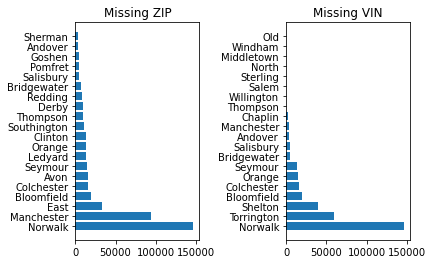

In [235]:
# Create a bar plot of the top 20 towns
top_20_missing_vin = town_missing_data_summary.sort_values("missing VIN", ascending = False).head(20)
top_20_missing_zip = town_missing_data_summary.sort_values("missing zip", ascending = False).head(20)

# Show bar plot
fig,axs = plt.subplots(nrows = 1, ncols = 2)

fig.subplots_adjust(wspace = 0.7)

x = np.arange(20)

axs[0].barh(y= "town",
       width = "missing zip",
       data= top_20_missing_zip)
axs[0].set_title("Missing ZIP")

axs[1].barh(y="town",
       width = "missing VIN",
       data = top_20_missing_vin)
axs[1].set_title("Missing VIN")

In [180]:
# Show totals
town_missing_data_summary.sum()

missing zip     452694
missing VIN     329946
not CT          930463
count          5790356
dtype: int64

## Conclusions
* There are a very large number of missing VINs in the dataset. 329946 is equal to 5.7% of the records having missing VINs, while 7.8% of the records have missing ZIPs

# Analyze norwalk

In [251]:
chunks = pd.read_csv(path / "ignored-data" / "vehicles_2022" /"2019-21_data_compiled_zipcitymatched.csv" , chunksize = 1000)
i = 0
nor_df = pd.DataFrame([])

In [252]:
for chunk in chunks:
    # Give progress
    if (i % 100 ==0):
        print(f"Currently on chunk number {i}")
        
    num_norwalk = sum(chunk["record_from"].str.contains("Norwalk"))
    
    if num_norwalk > 0:
        norwalk = chunk[chunk["record_from"].str.contains("Norwalk")]
        nor_df = pd.concat([nor_df, norwalk])
        print(f"Adding {len(norwalk)} entries for Norwalk")
        i+=1
    
    else:
        i+=1

Currently on chunk number 0
Currently on chunk number 100
Currently on chunk number 200
Currently on chunk number 300
Currently on chunk number 400
Currently on chunk number 500
Currently on chunk number 600
Currently on chunk number 700
Currently on chunk number 800
Currently on chunk number 900
Currently on chunk number 1000
Currently on chunk number 1100
Currently on chunk number 1200
Currently on chunk number 1300
Currently on chunk number 1400
Currently on chunk number 1500
Currently on chunk number 1600
Currently on chunk number 1700
Currently on chunk number 1800
Currently on chunk number 1900
Currently on chunk number 2000
Currently on chunk number 2100
Adding 477 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000

## Apparent issues with Norwalk

In [255]:
nor_df

,Unnamed: 0,index,record_from,UID,name,street,city,state,zip,vehicle_year,vehicle_make,vehicle_model,vehicle_class,vehicle_id,lease_city,lease_state,lease_street,lease_zip,city_list,zip_list,city_matched,zip_matched,valid_city,valid_zip,rep,lease_city_list,lease_zip_list,lease_city_matched,lease_zip_matched,lease_valid_city,lease_valid_zip,lease_rep,data_year
2183523,2183523,774270,103_Norwalk_MVData_2020.csv,20_0774271,NaN,NaN,Norwalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2020
2183524,2183524,774271,103_Norwalk_MVData_2020.csv,20_0774272,NaN,NaN,Norwalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2020
2183525,2183525,774272,103_Norwalk_MVData_2020.csv,20_0774273,NaN,NaN,Norwalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2020
2183526,2183526,774273,103_Norwalk_MVData_2020.csv,20_0774274,NaN,NaN,Norwalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2020
2183527,2183527,774274,103_Norwalk_MVData_2020.csv,20_0774275,NaN,NaN,Norwalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744722,4744722,1733672,103_Norwalk_MV_21.xlsx,21_1733673,NaN,NaN,Norwalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4744723,4744723,1733673,103_Norwalk_MV_21.xlsx,21_1733674,NaN,NaN,Norwalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4744724,4744724,1733674,103_Norwalk_MV_21.xlsx,21_1733675,NaN,NaN,Norwalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4744725,4744725,1733675,103_Norwalk_MV_21.xlsx,21_1733676,NaN,NaN,Norwalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021


## Attempt re-download...

In [8]:
chunks_2 = pd.read_csv(path / "ignored-data" / "vehicles_2022" /"2019-21 data compiled.csv" , chunksize = 1000)

In [9]:
i = 0
nor_df = pd.DataFrame([])

In [10]:
for chunk in chunks_2:
    # Give progress
    if (i % 100 ==0):
        print(f"Currently on chunk number {i}")
        
    num_norwalk = sum(chunk["record_from"].str.contains("Norwalk"))
    
    if num_norwalk > 0:
        norwalk = chunk[chunk["record_from"].str.contains("Norwalk")]
        nor_df = pd.concat([nor_df, norwalk])
        print(f"Adding {len(norwalk)} entries for Norwalk")
        i+=1
    
    else:
        i+=1

Currently on chunk number 0
Currently on chunk number 100
Currently on chunk number 200
Currently on chunk number 300
Currently on chunk number 400
Currently on chunk number 500
Currently on chunk number 600
Currently on chunk number 700
Currently on chunk number 800
Currently on chunk number 900
Currently on chunk number 1000
Currently on chunk number 1100
Currently on chunk number 1200
Currently on chunk number 1300
Currently on chunk number 1400
Currently on chunk number 1500
Currently on chunk number 1600
Currently on chunk number 1700
Currently on chunk number 1800
Currently on chunk number 1900
Currently on chunk number 2000
Currently on chunk number 2100
Adding 477 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000

In [13]:
nor_df["vehicle_id"].isna().sum() == len(nor_df)

True

In [14]:
i

5568

So all the entries in the norwalk file are NA for vehicle ID as well...

# Third attempted download

In [28]:
chunks_3 = pd.read_csv(path / "ignored-data" / "vehicles_2022" /"2019-21_data_compiled_simplified_zipcitymatched.csv" , chunksize = 1000)

In [29]:
i = 0
nor_df_2 = pd.DataFrame([])

for chunk in chunks_3:
    # Give progress
    if (i % 100 ==0):
        print(f"Currently on chunk number {i}")
        
    num_norwalk = sum(chunk["record_from"].str.contains("Norwalk"))
    
    if num_norwalk > 0:
        norwalk = chunk[chunk["record_from"].str.contains("Norwalk")]
        nor_df_2 = pd.concat([nor_df_2, norwalk])
        print(f"Adding {len(norwalk)} entries for Norwalk")
        i+=1
    
    else:
        i+=1

Currently on chunk number 0
Currently on chunk number 100
Currently on chunk number 200
Currently on chunk number 300
Currently on chunk number 400
Currently on chunk number 500
Currently on chunk number 600
Currently on chunk number 700
Currently on chunk number 800
Currently on chunk number 900
Currently on chunk number 1000
Currently on chunk number 1100
Currently on chunk number 1200
Currently on chunk number 1300
Currently on chunk number 1400
Currently on chunk number 1500
Currently on chunk number 1600
Currently on chunk number 1700
Currently on chunk number 1800
Currently on chunk number 1900
Currently on chunk number 2000
Currently on chunk number 2100
Adding 477 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000

In [31]:
nor_df_2["vehicle_id"].isna().sum()

146708

So this file also has all NAs for Norwalk...

In [35]:
nor_df_2.isna().sum()

Unnamed: 0            0
index                 0
record_from           0
UID                   0
name             146708
street           146708
city                  0
state            146708
zip              146708
vehicle_year     146708
vehicle_make     146708
vehicle_model    146708
vehicle_class    146708
vehicle_id       146708
lease_city       146708
lease_state      146708
lease_street     146708
lease_zip        146708
rep                   0
lease_rep             0
data_year             0
dtype: int64

# Attempt Manchester

In [39]:
chunks = pd.read_csv(path / "ignored-data" / "vehicles_2022" /"2019-21_data_compiled_zipcitymatched.csv" , chunksize = 1000)
i = 0
man_df = pd.DataFrame([])

In [40]:
for chunk in chunks:
    # Give progress
    if (i % 100 ==0):
        print(f"Currently on chunk number {i}")
        
    num_manchester = sum(chunk["record_from"].str.contains("Manchester"))
    
    if num_manchester > 0:
        manchester = chunk[chunk["record_from"].str.contains("Manchester")]
        man_df = pd.concat([man_df, manchester])
        print(f"Adding {len(manchester)} entries for Manchester")
        i+=1
    
    else:
        i+=1

Currently on chunk number 0
Currently on chunk number 100
Currently on chunk number 200
Currently on chunk number 300
Currently on chunk number 400
Currently on chunk number 500
Currently on chunk number 600
Currently on chunk number 700
Adding 373 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manc

In [60]:
man_df.isna().sum()

Unnamed: 0                0
index                     0
record_from               0
UID                       0
name                   3208
street                93477
city                      0
state                 93477
zip                   93477
vehicle_year          48993
vehicle_make           3208
vehicle_model          3451
vehicle_class         48993
vehicle_id             3205
lease_city            93477
lease_state           93477
lease_street          93477
lease_zip             93477
city_list             93477
zip_list              93477
city_matched              0
zip_matched               0
valid_city                0
valid_zip                 0
rep                       0
lease_city_list       93477
lease_zip_list        93477
lease_city_matched        0
lease_zip_matched         0
lease_valid_city          0
lease_valid_zip           0
lease_rep                 0
data_year                 0
dtype: int64

In [47]:
man_df[man_df["data_year"]==2021].head(30)

,Unnamed: 0,index,record_from,UID,name,street,city,state,zip,vehicle_year,vehicle_make,vehicle_model,vehicle_class,vehicle_id,lease_city,lease_state,lease_street,lease_zip,city_list,zip_list,city_matched,zip_matched,valid_city,valid_zip,rep,lease_city_list,lease_zip_list,lease_city_matched,lease_zip_matched,lease_valid_city,lease_valid_zip,lease_rep,data_year
4155381,4155381,1144331,077_Manchester_MV_21.xls,21_1144332,@Ursvc Llc,NaN,Manchester,NaN,NaN,2013.0,CADIL,SRX PREM,1.0,3GYFNJE33DS595309,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4155382,4155382,1144332,077_Manchester_MV_21.xls,21_1144333,1 800 Dump Runs Of Hartford Llc,NaN,Manchester,NaN,NaN,2004.0,ISUZU,FRR,2.0,JALF5C13547700369,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4155383,4155383,1144333,077_Manchester_MV_21.xls,21_1144334,1 800 Dump Runs Of Hartford Llc,NaN,Manchester,NaN,NaN,2004.0,UDUMP,61214R0,10.0,43ZDN22B340000019,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4155384,4155384,1144334,077_Manchester_MV_21.xls,21_1144335,1 800 Dump Runs Of Hartford Llc,NaN,Manchester,NaN,NaN,1998.0,WELD,UTILITY,10.0,1J9HH2421W1118262,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4155385,4155385,1144335,077_Manchester_MV_21.xls,21_1144336,1 800 Dump Runs Of Hartford Llc,NaN,Manchester,NaN,NaN,2007.0,KENWO,CONSTRUC,2.0,2NKMHZ7X07M210675,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4155386,4155386,1144336,077_Manchester_MV_21.xls,21_1144337,1-800-Dump Runs Of Hartford Llc,NaN,Manchester,NaN,NaN,2020.0,KW,CONSTRUC,1.0,1NKZX4TX2LJ392236,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4155387,4155387,1144337,077_Manchester_MV_21.xls,21_1144338,3333 Llc,NaN,Manchester,NaN,NaN,2006.0,CHEVR,SILVERAD,3.0,1GBJC34D36E178155,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4155388,4155388,1144338,077_Manchester_MV_21.xls,21_1144339,3333 Llc,NaN,Manchester,NaN,NaN,2018.0,FORD,F150 SUP,3.0,1FTEW1EP2JKD00922,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4155389,4155389,1144339,077_Manchester_MV_21.xls,21_1144340,3333 Llc,NaN,Manchester,NaN,NaN,2018.0,FORD,F150 SUP,3.0,1FTEW1EP2JFD57954,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021
4155390,4155390,1144340,077_Manchester_MV_21.xls,21_1144341,A & A Integrated Pest Man &,NaN,Manchester,NaN,NaN,2017.0,NISSA,FRONTIER,3.0,1N6AD0EV8HN702544,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,NaN,NaN,False,False,False,False,4,2021


So data for manchester is missing the street, ZIP, etc. - though this is available in the original files.

# Attempt Torrington

In [50]:
chunks = pd.read_csv(path / "ignored-data" / "vehicles_2022" /"2019-21_data_compiled_zipcitymatched.csv" , chunksize = 1000)
i = 0
torr_df = pd.DataFrame([])

In [51]:
for chunk in chunks:
    # Give progress
    if (i % 100 ==0):
        print(f"Currently on chunk number {i}")
        
    num_torrington = sum(chunk["record_from"].str.contains("Torrington"))
    
    if num_torrington > 0:
        torrington = chunk[chunk["record_from"].str.contains("Torrington")]
        torr_df = pd.concat([torr_df, torrington])
        print(f"Adding {len(torrington)} entries for Torrington")
        i+=1
    
    else:
        i+=1

Currently on chunk number 0
Currently on chunk number 100
Currently on chunk number 200
Currently on chunk number 300
Currently on chunk number 400
Currently on chunk number 500
Currently on chunk number 600
Currently on chunk number 700
Currently on chunk number 800
Currently on chunk number 900
Currently on chunk number 1000
Currently on chunk number 1100
Currently on chunk number 1200
Currently on chunk number 1300
Currently on chunk number 1400
Currently on chunk number 1500
Currently on chunk number 1600
Currently on chunk number 1700
Currently on chunk number 1800
Currently on chunk number 1900
Currently on chunk number 2000
Currently on chunk number 2100
Currently on chunk number 2200
Currently on chunk number 2300
Currently on chunk number 2400
Currently on chunk number 2500
Currently on chunk number 2600
Currently on chunk number 2700
Adding 3 entries for Torrington
Adding 1000 entries for Torrington
Adding 1000 entries for Torrington
Adding 1000 entries for Torrington
Adding 

In [63]:
len(torr_df)

0

In [62]:
torr_df.isna().sum()

Series([], dtype: float64)

In [55]:
torr_df["data_year"].unique()

array([2020, 2021], dtype=int64)

So the Torrington DataFrame contains no valid VINs - this despite the original file containing them (for 2021 at least!)

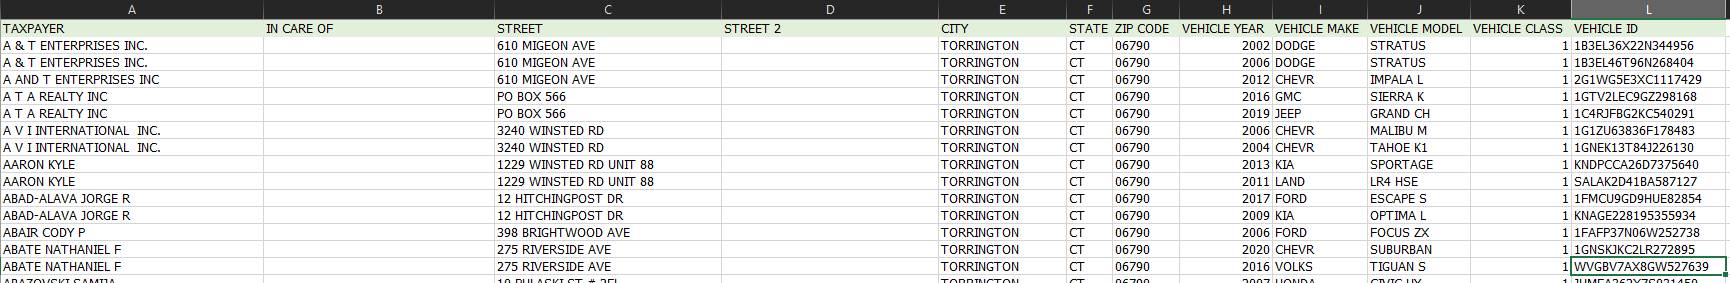

# Attempt with new dataset sent

Other DropBox file shared separately.

In [57]:
chunks_4 = pd.read_csv(path / "ignored-data" / "vehicles_2022" /"2019-21_data_compiled_simplified_zipcitymatched_new.csv" , chunksize = 1000)
i = 0
nor_df_2 = pd.DataFrame([])

In [58]:
i = 0
nor_df_2 = pd.DataFrame([])

for chunk in chunks_4:
    # Give progress
    if (i % 100 ==0):
        print(f"Currently on chunk number {i}")
        
    num_norwalk = sum(chunk["record_from"].str.contains("Norwalk"))
    
    if num_norwalk > 0:
        norwalk = chunk[chunk["record_from"].str.contains("Norwalk")]
        nor_df_2 = pd.concat([nor_df_2, norwalk])
        print(f"Adding {len(norwalk)} entries for Norwalk")
        i+=1
    
    else:
        i+=1

Currently on chunk number 0
Currently on chunk number 100
Currently on chunk number 200
Currently on chunk number 300
Currently on chunk number 400
Currently on chunk number 500
Currently on chunk number 600
Currently on chunk number 700
Currently on chunk number 800
Currently on chunk number 900
Currently on chunk number 1000
Currently on chunk number 1100
Currently on chunk number 1200
Currently on chunk number 1300
Currently on chunk number 1400
Currently on chunk number 1500
Currently on chunk number 1600
Currently on chunk number 1700
Currently on chunk number 1800
Currently on chunk number 1900
Currently on chunk number 2000
Currently on chunk number 2100
Adding 477 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000 entries for Norwalk
Adding 1000

In [61]:
nor_df_2.isna().sum()

Unnamed: 0            0
index                 0
record_from           0
UID                   0
name             146708
street           146708
city             146708
state            146708
zip              146708
vehicle_year     146708
vehicle_make     146708
vehicle_model    146708
vehicle_class    146708
vehicle_id       146708
lease_city       146708
lease_state      146708
lease_street     146708
lease_zip        146708
rep                   0
lease_rep             0
dtype: int64

## Attempt with new dataset and different town

In [64]:
chunks = pd.read_csv(path / "ignored-data" / "vehicles_2022" /"2019-21_data_compiled_simplified_zipcitymatched_new.csv" , chunksize = 1000)
i = 0
man_df = pd.DataFrame([])

In [65]:
for chunk in chunks:
    # Give progress
    if (i % 100 ==0):
        print(f"Currently on chunk number {i}")
        
    num_manchester = sum(chunk["record_from"].str.contains("Manchester"))
    
    if num_manchester > 0:
        manchester = chunk[chunk["record_from"].str.contains("Manchester")]
        man_df = pd.concat([man_df, manchester])
        print(f"Adding {len(manchester)} entries for Manchester")
        i+=1
    
    else:
        i+=1

Currently on chunk number 0
Currently on chunk number 100
Currently on chunk number 200
Currently on chunk number 300
Currently on chunk number 400
Currently on chunk number 500
Currently on chunk number 600
Currently on chunk number 700
Adding 373 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manchester
Adding 1000 entries for Manc

In [66]:
man_df.isna().sum()

Unnamed: 0           0
index                0
record_from          0
UID                  0
name              3208
street           93477
city             93477
state            93477
zip              93477
vehicle_year     48993
vehicle_make      3208
vehicle_model     3451
vehicle_class    48993
vehicle_id        3205
lease_city       93477
lease_state      93477
lease_street     93477
lease_zip        93477
rep                  0
lease_rep            0
dtype: int64

In [71]:
man_df[man_df["record_from"]=='077_Manchester_MV_21.xls']

,Unnamed: 0,index,record_from,UID,name,street,city,state,zip,vehicle_year,vehicle_make,vehicle_model,vehicle_class,vehicle_id,lease_city,lease_state,lease_street,lease_zip,rep,lease_rep
4155381,4155381,1144331,077_Manchester_MV_21.xls,21_1144332,@Ursvc Llc,NaN,NaN,NaN,NaN,2013.0,CADIL,SRX PREM,1.0,3GYFNJE33DS595309,NaN,NaN,NaN,NaN,4,4
4155382,4155382,1144332,077_Manchester_MV_21.xls,21_1144333,1 800 Dump Runs Of Hartford Llc,NaN,NaN,NaN,NaN,2004.0,ISUZU,FRR,2.0,JALF5C13547700369,NaN,NaN,NaN,NaN,4,4
4155383,4155383,1144333,077_Manchester_MV_21.xls,21_1144334,1 800 Dump Runs Of Hartford Llc,NaN,NaN,NaN,NaN,2004.0,UDUMP,61214R0,10.0,43ZDN22B340000019,NaN,NaN,NaN,NaN,4,4
4155384,4155384,1144334,077_Manchester_MV_21.xls,21_1144335,1 800 Dump Runs Of Hartford Llc,NaN,NaN,NaN,NaN,1998.0,WELD,UTILITY,10.0,1J9HH2421W1118262,NaN,NaN,NaN,NaN,4,4
4155385,4155385,1144335,077_Manchester_MV_21.xls,21_1144336,1 800 Dump Runs Of Hartford Llc,NaN,NaN,NaN,NaN,2007.0,KENWO,CONSTRUC,2.0,2NKMHZ7X07M210675,NaN,NaN,NaN,NaN,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199863,4199863,1188813,077_Manchester_MV_21.xls,21_1188814,Zysk Donald R,NaN,NaN,NaN,NaN,2009.0,FORD,F150,1.0,1FTRF12859KB23566,NaN,NaN,NaN,NaN,4,4
4199864,4199864,1188814,077_Manchester_MV_21.xls,21_1188815,Zysk Donald R,NaN,NaN,NaN,NaN,2010.0,NISSA,ALTIMA 2,1.0,1N4AL2AP2AN549552,NaN,NaN,NaN,NaN,4,4
4199865,4199865,1188815,077_Manchester_MV_21.xls,21_1188816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
4199866,4199866,1188816,077_Manchester_MV_21.xls,21_1188817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
